In [2]:
import hypernetx as hnx
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import warnings 
warnings.simplefilter('ignore')

from collections import defaultdict
from hypernetx.drawing import draw_incidence
from hypernetx.drawing import draw_bipartite

from importlib import reload; reload(draw_incidence); reload(draw_bipartite)

<module 'hypernetx.drawing.draw_bipartite' from '/Users/yunj738/projects/hypernetx/hypernetx/drawing/draw_bipartite.py'>

# Data

The data in several of our notebooks are taken from the jean.dat dataset available from the Stanford GraphBase at https://www-cs-faculty.stanford.edu/~knuth/sgb.html. This data gives character scene incidence information from the novel Les Miserables by Victor Hugo.

In [3]:
scenes = {
    0: ('FN', 'TH'),
    1: ('TH', 'JV'),
    2: ('BM', 'FN', 'JA'),
    3: ('JV', 'JU', 'CH', 'BM'),
    4: ('JU', 'CH', 'BR', 'CN', 'CC', 'JV', 'BM'),
    5: ('TH', 'GP'),
    6: ('GP', 'MP'),
    7: ('MA', 'GP')
}

H = hnx.Hypergraph(scenes)

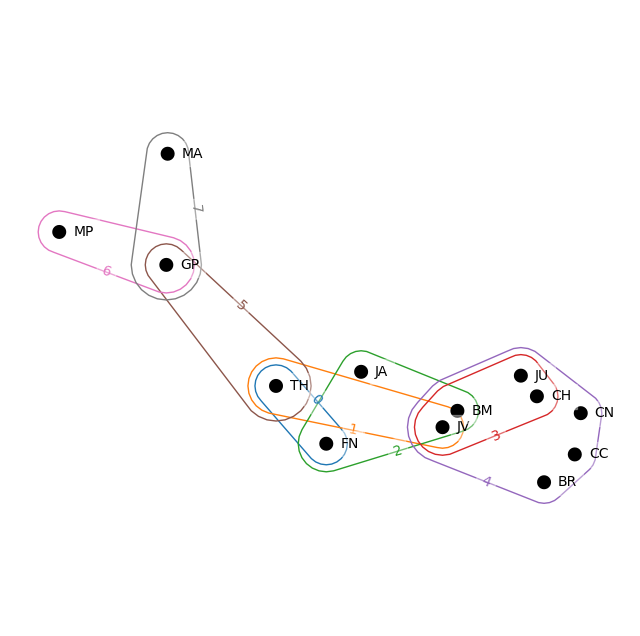

In [4]:
hnx.drawing.draw(H)

# Advanced Visualization Parameters
Properties like colors and thickness can be adjusted. This allows style parameters to be passed directly to the corresponding Matplotlib function. The mapping is as follows:
* `edges_kwargs` => `matplotlib.collections.PolyCollection`
* `nodes_kwargs` => `matplotlib.collections.PolyCollection`
* `edge_labels_kwargs` => `matplotlib.annotate`
* `node_labels_kwargs` => `matplotlib.annotate`

['CN', 'BR', 'CC', 'JU', 'CH', 'BM', 'JA', 'JV', 'FN', 'TH', 'GP', 'MP', 'MA'] [np.int64(4), np.int64(3), np.int64(2), np.int64(1), np.int64(0), np.int64(5), np.int64(6), np.int64(7)]
{np.int64(4): (0, 0), np.int64(3): (0, 3), np.int64(2): (0, 5), np.int64(1): (0, 7), np.int64(0): (0, 8), np.int64(5): (0, 9), np.int64(6): (0, 10), np.int64(7): (0, 11), 'CN': (6.5, 0), 'BR': (6.5, 1), 'CC': (6.5, 2), 'JU': (6.5, 3), 'CH': (6.5, 4), 'BM': (6.5, 5), 'JA': (6.5, 6), 'JV': (6.5, 7), 'FN': (6.5, 8), 'TH': (6.5, 9), 'GP': (6.5, 10), 'MP': (6.5, 11), 'MA': (6.5, 12)}


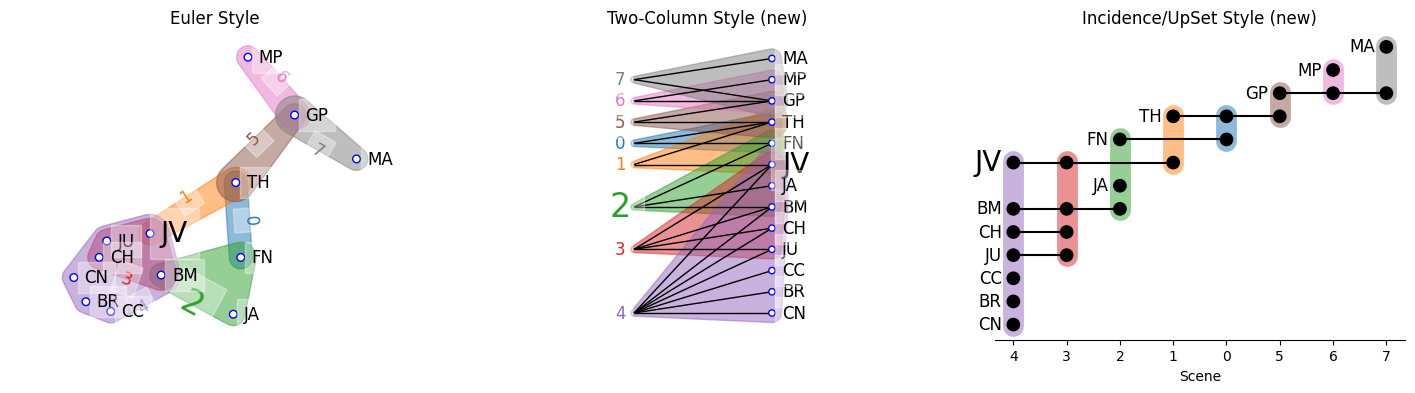

In [31]:
node_labels_kwargs={
    # 'fontsize': lambda v: 36 if v == 'JV' else 12,
    'fontsize': {v: 20 if v=='JV' else 12 for v in H},
}

edge_labels_kwargs={
    'fontsize': [24 if H.size(v) == 3 else 12 for v in H.edges()]
}

edge_color = lambda e: plt.cm.tab10(e)
lighter_edge_color = lambda e: edge_color(e) + np.array([0, 0, 0, -.5])

kwargs = {
    'edges_kwargs': {
        'edgecolors': edge_color,
        'facecolors': lighter_edge_color,
        'color': lighter_edge_color,
        
    },
    'nodes_kwargs': {
        'edgecolors': 'blue',
        'facecolors': 'white',
    },
    'node_labels_kwargs': node_labels_kwargs,
    'edge_labels_kwargs': edge_labels_kwargs
}

plt.figure(figsize=(18, 4))

plt.subplot(131)
plt.title('Euler Style')
hnx.draw(H, **kwargs)

plt.subplot(132)
plt.title('Two-Column Style (new)')
draw_bipartite.draw_bipartite_using_euler(H, **kwargs)

plt.subplot(133)
plt.title('Incidence/UpSet Style (new)')
draw_incidence.draw_incidence_upset(
    H,
    **kwargs
)
plt.xlabel('Scene');

## Colors
Pass a single string to set a specific color for all nodes/edges. Pass a function, array, or dictionary using matplotlib colors to configure individual colors of nodes/edges. 

### Node color

We can configure node colors by setting facecolors and edgecolors in `node_kwargs` using a single string, array, dict, or a function. 

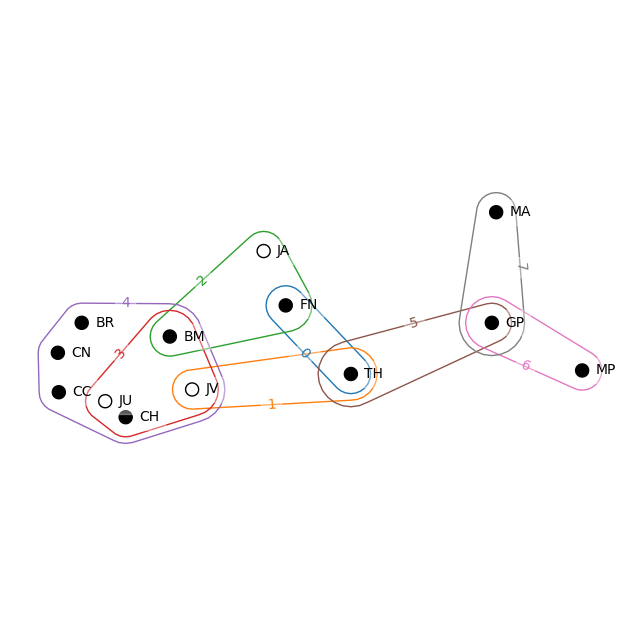

In [50]:
hnx.drawing.draw(
    H,
    nodes_kwargs={
        'facecolors': lambda n: 'white' if 'J' in n else 'black',
        'edgecolors': 'black'
    }
)

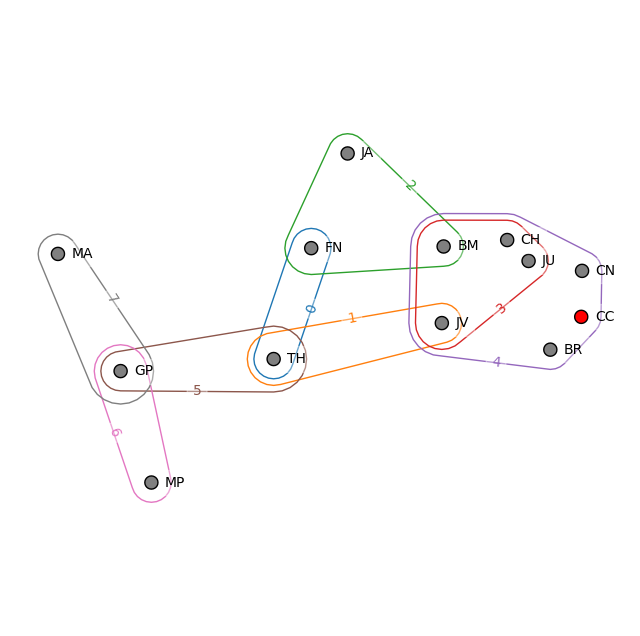

In [51]:
hnx.drawing.draw(
    H,
    nodes_kwargs={
        'facecolors': {v: 'red' if v == 'CC' else 'gray' for v in H.nodes()},
        'edgecolors': 'black'
    }
)

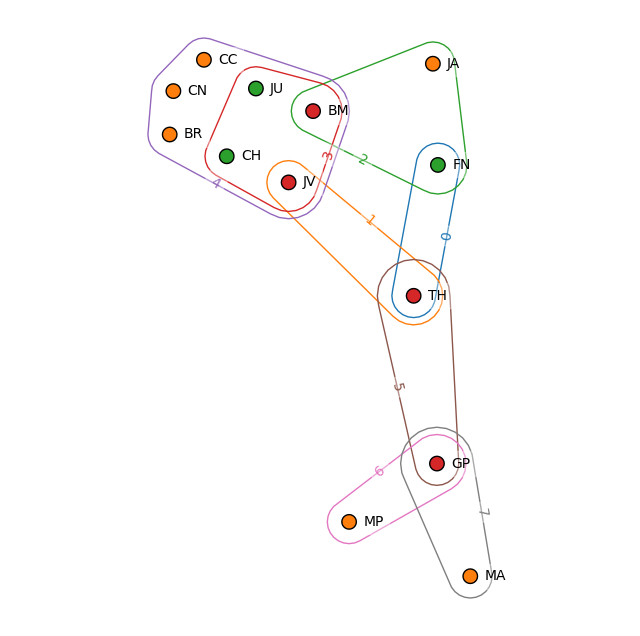

In [52]:
hnx.drawing.draw(
    H,
    nodes_kwargs={
        'facecolors': [plt.cm.tab10(H.degree(n)) for n in H.__iter__()],
        'edgecolors': 'black'
    }
)

### Edge color

By default, we cycle through one of 10 unique colors for edges. This can be overridden using the `edges_kwargs` parameter. Here we adjust the linewidth, edge color, and face color. 

In this example, we are using collapsed nodes using `collapse_nodes`.

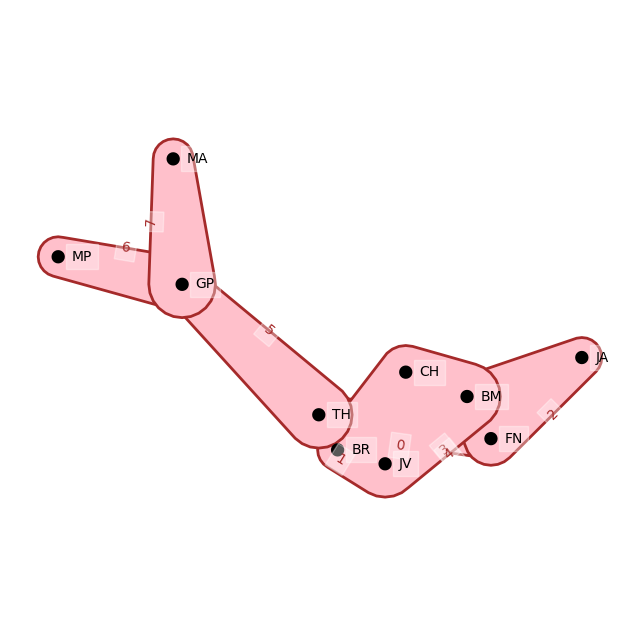

In [47]:
from hypernetx.drawing.util import get_collapsed_size
H_collapsed = H.collapse_nodes()

hnx.drawing.draw(H_collapsed,
    edges_kwargs={
        'linewidths': 2,
        'edgecolors': 'brown',
        'facecolors': 'pink'
    }
)

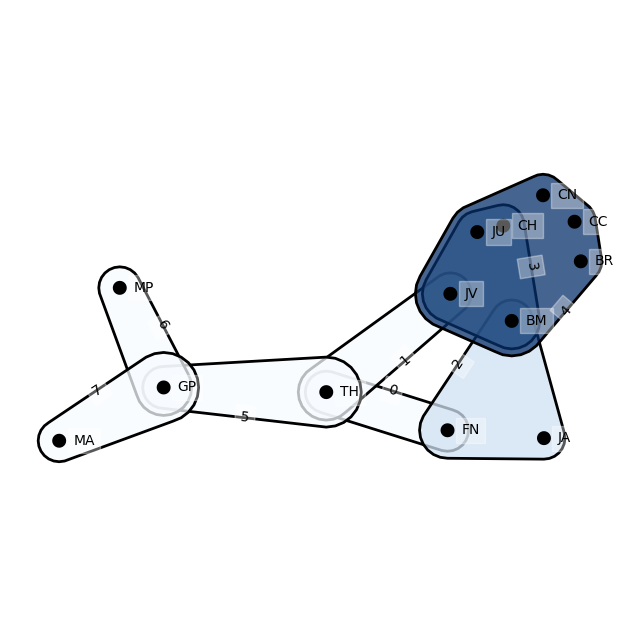

In [49]:
cmap = plt.cm.Blues
alpha = .75

sizes = np.array([H.size(e) for e in H.edges()])
norm = plt.Normalize(sizes.min(), sizes.max())

hnx.drawing.draw(H,
    edges_kwargs={
        'facecolors': cmap(norm(sizes))*(1, 1, 1, alpha),
        'edgecolors': 'black',
        'linewidths': 2
    }
)

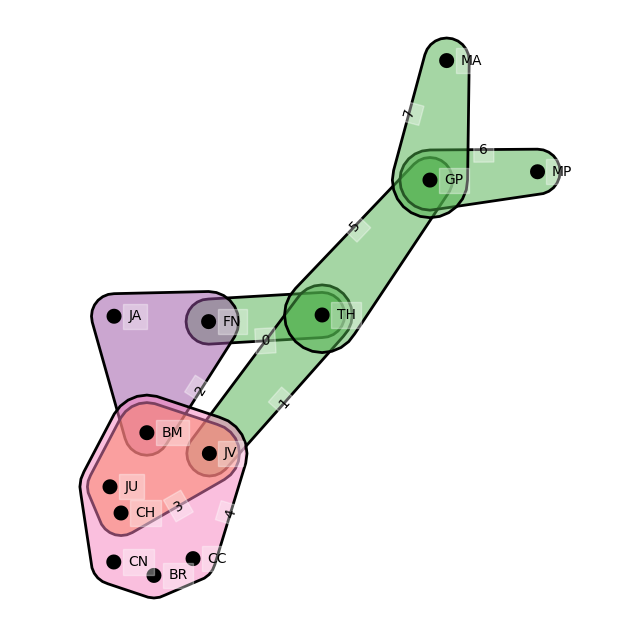

In [32]:
edge_color_dict = {e: plt.cm.Set1(H.size(e)) + np.array([0, 0, 0, -.5]) for e in H.edges()}

hnx.drawing.draw(H,
    edges_kwargs={
        'linewidths': 2,
        'edgecolors': 'black',
        'facecolors': edge_color_dict
    }
)

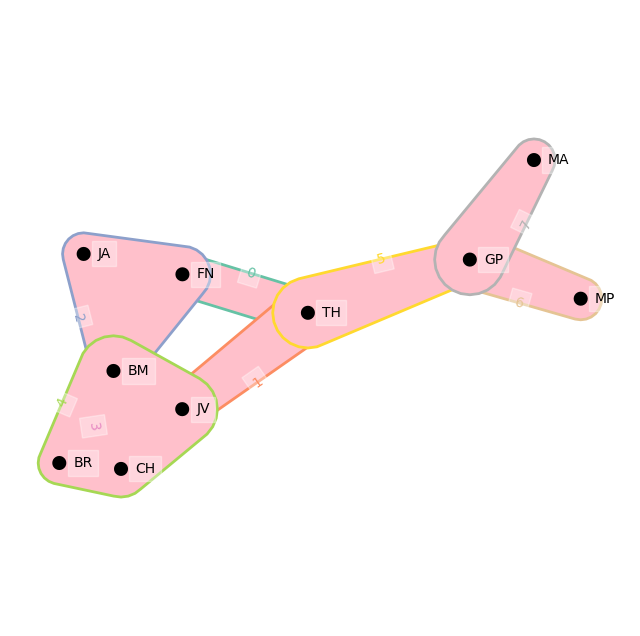

In [45]:
edge_color_func = lambda e: plt.cm.Set2(e)

hnx.drawing.draw(H_collapsed,
    edges_kwargs={
        'linewidths': 2,
        'edgecolors': edge_color_func,
        'facecolors': 'pink'
    }
)

## Font
Fontsize and other attributes can be set with the `node_labels_kwargs` and `edge_labels_kwargs` parameters. Here we set the font size at 24 to make the nodes appear large for illustrative purposes.

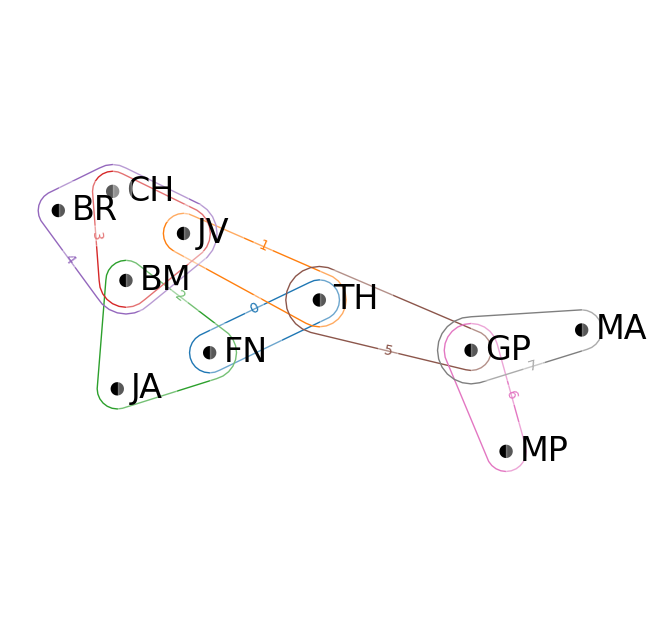

In [30]:
hnx.drawing.draw(H.collapse_nodes(),
    node_labels_kwargs={
        'fontsize': 24
    }
)

Font attributes can be individually set by passing in a dictionary mapping nodes to values

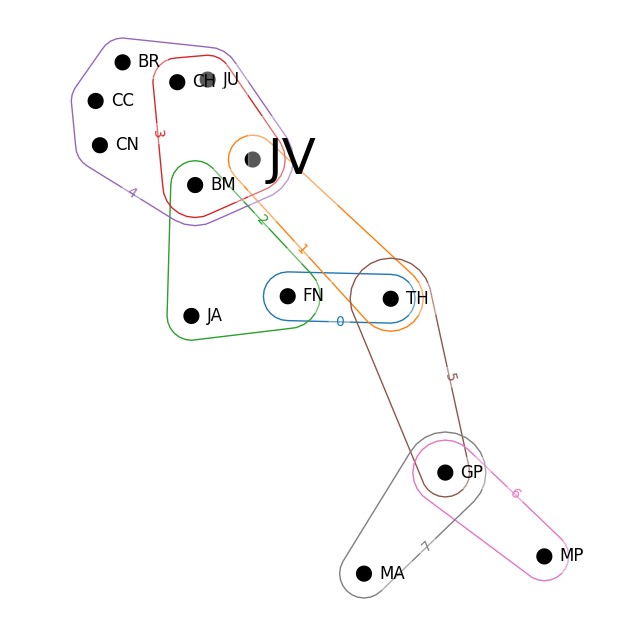

In [20]:
hnx.drawing.draw(H,
    node_labels_kwargs={
        'fontsize': {
            v: 36 if v == 'JV' else 12 for v in H
        }
    }
)